In [7]:
import numpy as np
import jax
from matplotlib import pyplot as plt
from jax import numpy as jnp
from jax import jit as jjit
from jax import vmap

mred = u'#d62728' 
mgreen = u'#2ca02c'
mblue = u'#1f77b4' 

## Delay time distribution (DTD) Eq. 6 of https://academic.oup.com/mnras/article/506/3/3330/6318383?login=false

In [8]:
@jjit
## tau    (Gyr)
## tp      (Gyr)
## A   (1e-13 M^{-1}_{sun} yr^{-1}
##
##  Nominal values A=2.11; beta=-1.13; tp=0.04

def DTD(tau, A, beta, tp):
    return jax.lax.cond(tau < tp, lambda a: 0., lambda a : a[0]*jnp.power(a[1],a[2]), [A, tau, beta])

In [9]:
DTD_vmap = jjit(vmap(DTD, in_axes=(0, None, None, None)))

In [10]:
A=2.11; beta=-1.13; tp=0.04

In [11]:
tau = jnp.linspace(0, 1, 100)

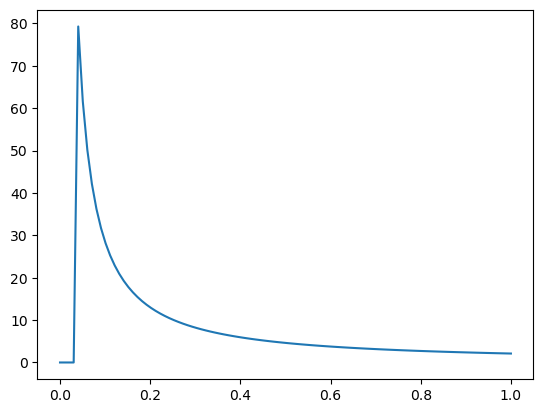

In [12]:
fig, ax = plt.subplots(1, 1)
__=ax.plot(tau, DTD_vmap(tau, A, beta, tp))

## Placeholder Main Sequence of Star Formation with stupid t-z relation Eq. 8 of  https://academic.oup.com/mnras/article/506/3/3330/6318383?login=false

In [46]:
@jjit
## M    (1e10)
## t Gyr
def SFH(t, M):
    d = t * 1e9 * 3.16e7 * 3e8 /3.09e16/1e6 # Mpc
    z= 68.*d/3e5
    return jnp.power(M,0.7)*(jnp.exp(1.9*z)/(jnp.exp(1.7*(z-2))+jnp.exp(0.2*(z-2))))

In [47]:
SFH_vmap = jjit(vmap(SFH, in_axes=(0, None)))

In [48]:
M=1.

In [49]:
t = jnp.linspace(0, 10, 100)

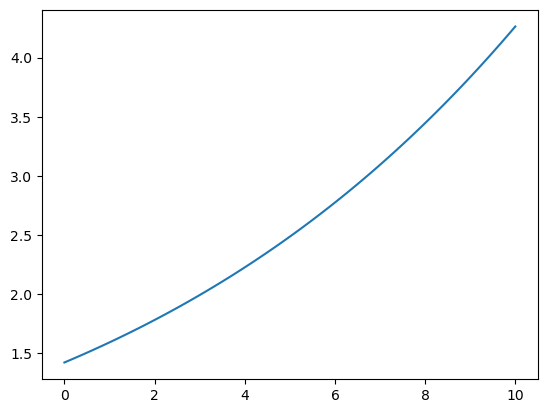

In [50]:
fig, ax = plt.subplots(1, 1)
__=ax.plot(t, SFH_vmap(t, M))

In [51]:
## Supernova Rate

In [58]:
@jjit
def SNR_kernel(tau, t0, M, A, beta, tp):
    return DTD(t0-tau, A, beta, tp)*SFH(tau, M)

In [59]:
SNR_kernel_vmap = jjit(vmap(SNR_kernel, in_axes=(0, None, None, None, None, None)))

In [82]:
@jjit
def SNR(t0, M, A, beta, tp):
    tf=10.
    taus = jnp.linspace(t0, tf, 1000)
    kernel = SNR_kernel_vmap(t0-taus, t0, M, A, beta, tp)
    return jnp.trapz(kernel,taus)

In [85]:
SNR_vmap = jjit(vmap(SNR, in_axes=(0, None, None, None, None)))

In [80]:
t0=jnp.linspace(0, 2, 10)

DeviceArray(0.69602495, dtype=float32)

In [89]:
SNR_vmap([1,1.5], M, A, beta, tp)

ValueError: vmap was requested to map its argument along axis 0, which implies that its rank should be at least 1, but is only 0 (its shape is ())

ValueError: vmap was requested to map its argument along axis 0, which implies that its rank should be at least 1, but is only 0 (its shape is ())

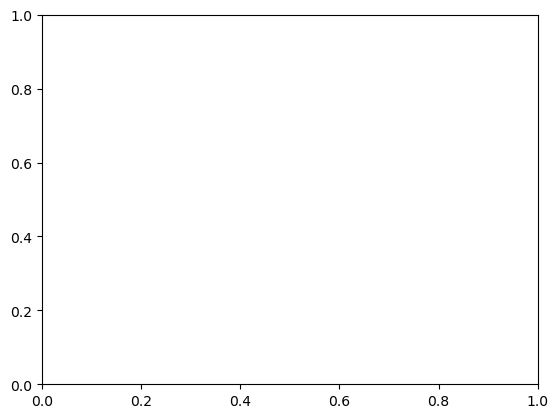

In [87]:
fig, ax = plt.subplots(1, 1)
__=ax.plot(t0, SNR_vmap(t0, M, A, beta, tp))

In [68]:
t0-tau

DeviceArray([3.       , 2.989899 , 2.979798 , 2.969697 , 2.959596 ,
             2.9494948, 2.939394 , 2.929293 , 2.9191918, 2.909091 ,
             2.89899  , 2.8888888, 2.878788 , 2.868687 , 2.8585858,
             2.8484848, 2.838384 , 2.8282828, 2.8181818, 2.808081 ,
             2.7979798, 2.7878788, 2.7777777, 2.7676768, 2.7575758,
             2.7474747, 2.7373738, 2.7272727, 2.7171717, 2.7070708,
             2.6969697, 2.6868687, 2.6767676, 2.6666667, 2.6565657,
             2.6464646, 2.6363635, 2.6262627, 2.6161616, 2.6060605,
             2.5959597, 2.5858586, 2.5757575, 2.5656567, 2.5555556,
             2.5454545, 2.5353537, 2.5252526, 2.5151515, 2.5050504,
             2.4949496, 2.4848485, 2.4747474, 2.4646463, 2.4545455,
             2.4444444, 2.4343433, 2.4242425, 2.4141414, 2.4040403,
             2.3939395, 2.3838384, 2.3737373, 2.3636365, 2.3535354,
             2.3434343, 2.3333333, 2.3232324, 2.3131313, 2.3030303,
             2.2929292, 2.2828283, 2.2727273, 2.

In [ ]:
from matplotlib import pyplot as plt
mred = u'#d62728' 
mgreen = u'#2ca02c'
mblue = u'#1f77b4' 

fig, ax = plt.subplots(1, 1)
__=ax.plot(xarr, yarr)

In [ ]:
xarr

In [ ]:
def func(x):
    for i in range(10):
        x = x - i*0.1*x + i*i
    return np.mean(x[:100])

In [ ]:
import numpy as np

xarr_timeit = np.random.uniform(0, 1, int(1e6))


In [ ]:
%timeit func(xarr_timeit)

In [ ]:
from jax import jit as jjit

@jjit
def jax_func(x):
    for i in range(10):
        x = x - i*0.1*x + i*i
    return jnp.mean(x[:100])

In [ ]:
jax_func(xarr_timeit)

In [ ]:
%timeit jax_func(xarr_timeit)

In [ ]:
from jax import grad

sin_deriv = jjit(grad(jnp.sin))

np.cos(np.pi/8), sin_deriv(np.pi/8)